In [1]:
# import common packages

import numpy as np

from matplotlib import pyplot
from matplotlib.pyplot import *
import seaborn as sns

import scipy
import sklearn


In [2]:
# import the algorithm class

from NMF_algorithm import NMF_model

In [3]:
# import a simple function generating synthetic example and the corresponding visualization function

from generate_synthetic import simulation_Ex1, plot_decomposition

# Noiseless synthetic example

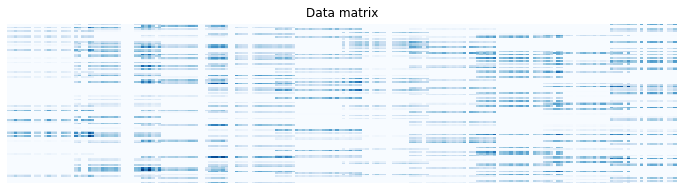

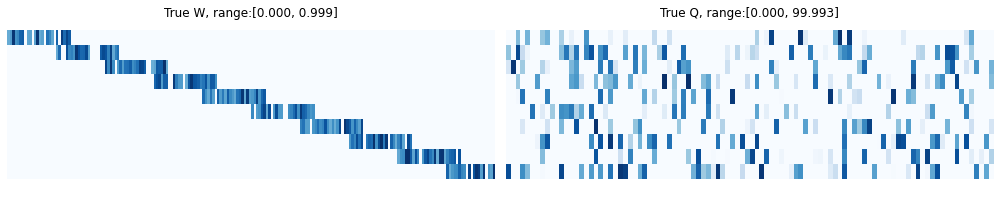

In [4]:
# Objective: decomposition input matrix P into P = W Q'
# In this synthetic example, the input P is of size 200 x 100
# The true W and true Q are known for evaluation
# The blocks in true W is set to have a 15 units of overlap (introduce some correlation between dimensions)
# The intrinsic dimension is 10
# no extra gaussian is introduced to the input matrix in this example

true_W, true_Q, _, P_clean, P = simulation_Ex1(200, 100, 10, 5, noise=False)

# save data for record
np.savez('./Example-synthetic/synthetic_clean.npz', P=P, data_mask=np.ones_like(P))

### Version 'generic'

In [5]:
# initialize the model
# data_matrix = P
# data_mask = np.ones_like(P) means all data entries are available (See function's comment for details)
# dimension = 15 : set if the desired/true dimension is known. Can be estimated by 'BIC_dimension'
# method = 'generic' : generic NMF algorithm with sparsity control
# sparsity_parameter : hyperparmeter controlling the strength of the sparsity representation

model = NMF_model(P, np.ones_like(P), 15, method='generic', sparsity_parameter=0.01)

/Users/lamk5/miniconda/envs/tfntorch/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  ConvergenceWarning,
/Users/lamk5/miniconda/envs/tfntorch/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  ConvergenceWarning,
/Users/lamk5/miniconda/envs/tfntorch/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  ConvergenceWarning,
/Users/lamk5/miniconda/envs/tfntorch/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  ConvergenceWarning,
/Users/lamk5/miniconda/envs/tfntorch/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarn

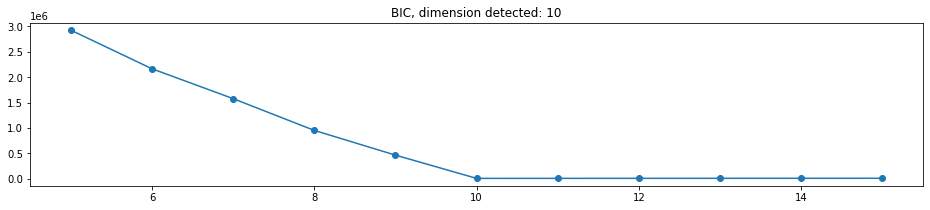

In [6]:
# During initialization, we set dimension = 15.
# Alternatively, we could determine the dimension using BIC. 
# If we know that the dimension should be between 5 and 15, we could estimate the optimal dimension by:

model.BIC_dimension(plot=True, search_range=np.arange(5, 16))

# Once BIC_dimension is estimated, the model's dimension will be updated to the optimal one.
# We can then perform decomposition as follow:

W, Q = model.decomposition()

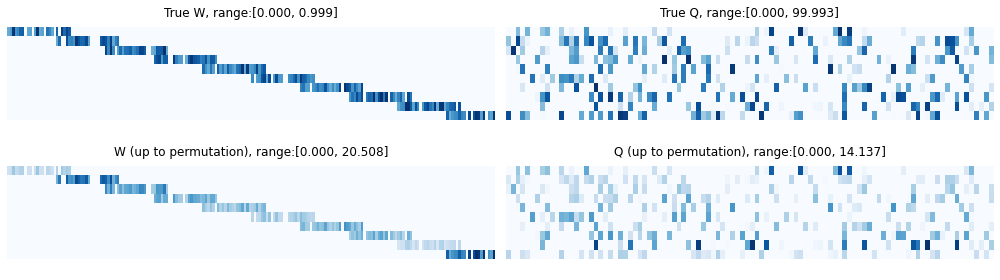

In [7]:
# Visualization the results and compare with the groundtruth solution
plot_decomposition(W, Q, true_W, true_Q)

### Version 'admm'

In [8]:
# initialize the model
# data_matrix = P
# data_mask = np.ones_like(P) means all data entries are available (See function's comment for details)
# dimension = 15 : set if the desired/true dimension is known. Can be estimated by 'BIC_dimension'
# method = 'admm' : algorithm that allows setting an upper bound constraints to W and Q
# Wbound = (True, 1.0) : We set an upper bound to every entries of W to be 1.0.
#                        This setting is problem dependent.
#                        Useful for improve intrepretability of the representation in some scenario
# sparsity_parameter : hyperparmeter controlling the strength of the sparsity representation

model = NMF_model(P, np.ones_like(P), 15, method='admm', Wbound=(True, 1.0), sparsity_parameter=0.01)

/Users/lamk5/miniconda/envs/tfntorch/lib/python3.7/site-packages/sklearn/utils/extmath.py:376: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  FutureWarning,
Loss:   0%|                                                                                                                               | 0/200 [00:00<?, ?it/s]/Users/lamk5/Google Drive/GitProjects/MatrixFactorization/admm_model.py:158: RuntimeWarning: invalid value encountered in true_divide
  idx = np.where(np.abs(prev_obj[idx] - obj)/np.abs(obj) > tol)[0]
/Users/lamk5/Google Drive/GitProjects/MatrixFactorization/admm_model.py:195: RuntimeWarning: invalid value encountered in true_divide


Algorithm converged with relative error < 0.001.


Loss: 1.214e+06:  34%|████████████████████████████████████▉                                                                      | 69/200 [00:04<00:07, 16.90it/s]


Algorithm converged with relative error < 0.001.


Loss: 9.318e+05:  42%|████████████████████████████████████████████▉                                                              | 84/200 [00:05<00:07, 16.15it/s]


Algorithm converged with relative error < 0.001.


Loss: 5.909e+05:  63%|██████████████████████████████████████████████████████████████████▊                                       | 126/200 [00:07<00:04, 16.75it/s]


Algorithm converged with relative error < 0.001.


Loss: 3.473e+05:  38%|████████████████████████████████████████▋                                                                  | 76/200 [00:05<00:08, 14.12it/s]


Algorithm converged with relative error < 0.001.


Loss: 2.799e+04:  48%|██████████████████████████████████████████████████▊                                                        | 95/200 [00:06<00:06, 15.13it/s]


Algorithm converged with relative error < 0.001.


Loss: 2.799e+04:  48%|██████████████████████████████████████████████████▊                                                        | 95/200 [00:06<00:07, 13.95it/s]


Algorithm converged with relative error < 0.001.


Loss: 2.799e+04:  48%|██████████████████████████████████████████████████▊                                                        | 95/200 [00:06<00:07, 14.22it/s]


Algorithm converged with relative error < 0.001.


Loss: 2.799e+04:  48%|██████████████████████████████████████████████████▊                                                        | 95/200 [00:06<00:07, 14.02it/s]


Algorithm converged with relative error < 0.001.


Loss: 2.799e+04:  48%|██████████████████████████████████████████████████▊                                                        | 95/200 [00:06<00:07, 14.05it/s]


Algorithm converged with relative error < 0.001.


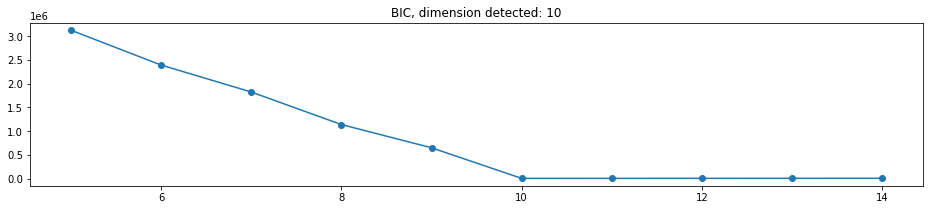

/Users/lamk5/miniconda/envs/tfntorch/lib/python3.7/site-packages/sklearn/utils/extmath.py:376: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  FutureWarning,
Loss:   0%|                                                                                                                               | 0/200 [00:00<?, ?it/s]/Users/lamk5/Google Drive/GitProjects/MatrixFactorization/admm_model.py:158: RuntimeWarning: invalid value encountered in true_divide
  idx = np.where(np.abs(prev_obj[idx] - obj)/np.abs(obj) > tol)[0]
/Users/lamk5/Google Drive/GitProjects/MatrixFactorization/admm_model.py:195: RuntimeWarning: invalid value encountered in true_divide


Algorithm converged with relative error < 0.001.


In [9]:
# During initialization, we set dimension = 15.
# Alternatively, we could determine the dimension using BIC. 
# If we know that the dimension should be between 5 and 15, we could estimate the optimal dimension by:

model.BIC_dimension(plot=True, search_range=np.arange(5, 15))

# Once BIC_dimension is estimated, the model's dimension will be updated to the optimal one.
# We can then perform decomposition as follow:

W, Q = model.decomposition()

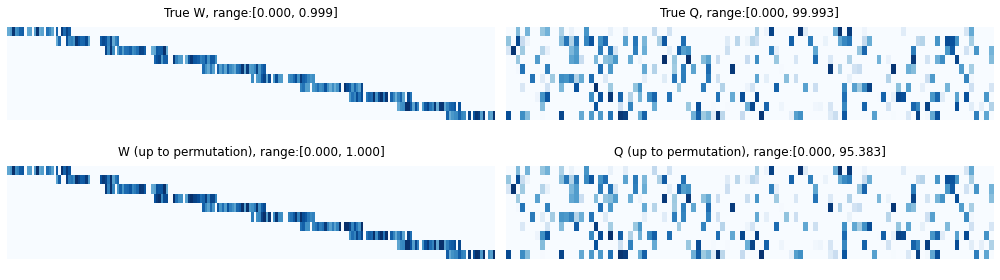

In [10]:
# Visualization the results and compare with the groundtruth solution
plot_decomposition(W, Q, true_W, true_Q)

# Synthetic example with noise added

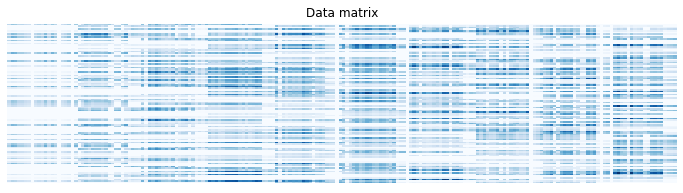

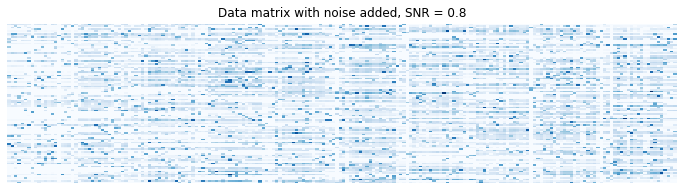

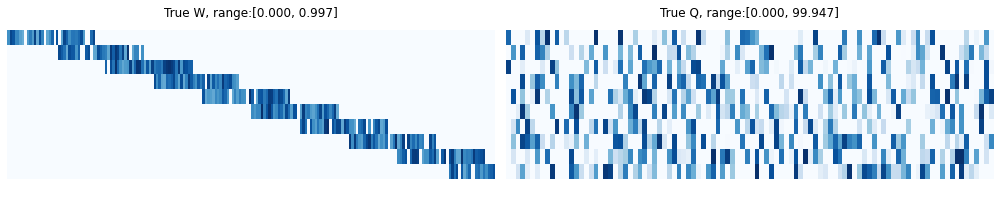

In [11]:
true_W, true_Q, _, P_clean, P = simulation_Ex1(200, 100, 10, 15, 0.5, noise=True, SNR=0.8)

np.savez('./Example-synthetic/synthetic_noise.npz', P=P, data_mask=np.ones_like(P))

### Version 'generic'

/Users/lamk5/miniconda/envs/tfntorch/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  ConvergenceWarning,
/Users/lamk5/miniconda/envs/tfntorch/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  ConvergenceWarning,
/Users/lamk5/miniconda/envs/tfntorch/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  ConvergenceWarning,


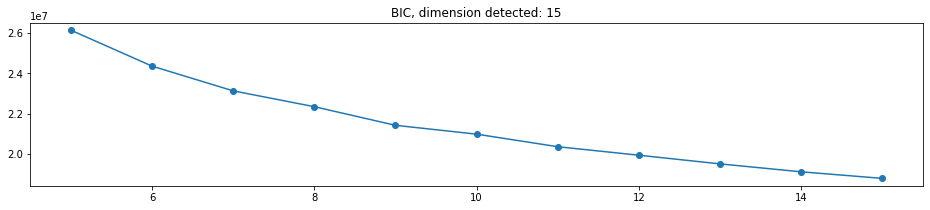

/Users/lamk5/miniconda/envs/tfntorch/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  ConvergenceWarning,


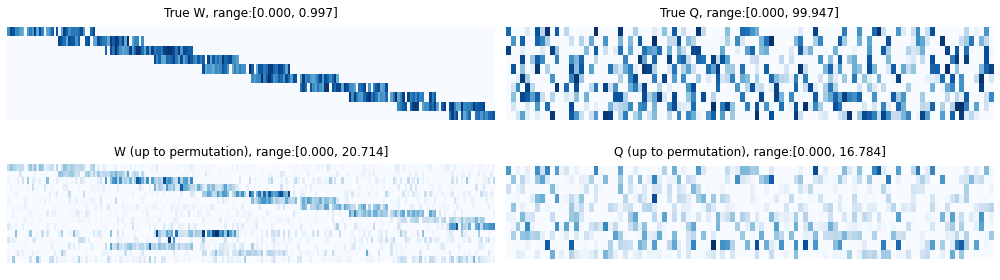

In [12]:
model = NMF_model(P, np.ones_like(P), 15, method='generic', sparsity_parameter=0.01)
model.BIC_dimension(plot=True, search_range=np.arange(5, 16))
W, Q = model.decomposition()
plot_decomposition(W, Q, true_W, true_Q)

### Version 'admm'

/Users/lamk5/miniconda/envs/tfntorch/lib/python3.7/site-packages/sklearn/utils/extmath.py:376: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  FutureWarning,
Loss: 1.39e+07:  11%|███████████▉                                                                                                | 22/200 [00:01<00:10, 17.44it/s]


Algorithm converged with relative error < 0.001.


Loss: 1.33e+07:  13%|██████████████                                                                                              | 26/200 [00:01<00:10, 16.17it/s]


Algorithm converged with relative error < 0.001.


Loss: 1.278e+07:  16%|█████████████████                                                                                          | 32/200 [00:02<00:10, 15.34it/s]


Algorithm converged with relative error < 0.001.


Loss: 1.17e+07:  38%|████████████████████████████████████████▌                                                                   | 75/200 [00:04<00:07, 15.90it/s]


Algorithm converged with relative error < 0.001.


Loss: 1.129e+07:  42%|█████████████████████████████████████████████▍                                                             | 85/200 [00:05<00:07, 15.29it/s]


Algorithm converged with relative error < 0.001.


Loss: 1.087e+07:  48%|███████████████████████████████████████████████████▎                                                       | 96/200 [00:06<00:06, 15.01it/s]


Algorithm converged with relative error < 0.001.


Loss: 1.149e+07:  28%|█████████████████████████████▍                                                                             | 55/200 [00:03<00:10, 13.79it/s]


Algorithm converged with relative error < 0.001.


Loss: 1.055e+07:  53%|████████████████████████████████████████████████████████▏                                                 | 106/200 [00:08<00:07, 12.98it/s]


Algorithm converged with relative error < 0.001.


Loss: 1.096e+07:  34%|███████████████████████████████████▊                                                                       | 67/200 [00:05<00:11, 11.65it/s]


Algorithm converged with relative error < 0.001.


Loss: 1.072e+07:  31%|█████████████████████████████████▏                                                                         | 62/200 [00:05<00:12, 11.49it/s]


Algorithm converged with relative error < 0.001.


Loss: 1.066e+07:  30%|████████████████████████████████                                                                           | 60/200 [00:05<00:12, 11.30it/s]


Algorithm converged with relative error < 0.001.


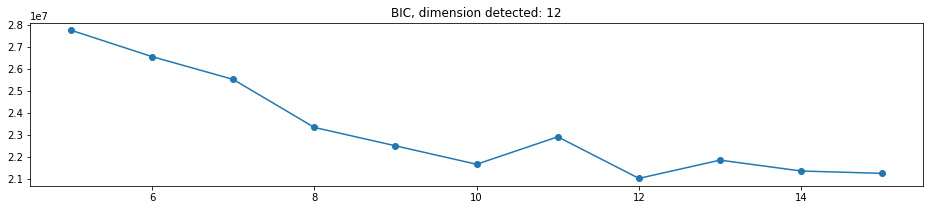

/Users/lamk5/miniconda/envs/tfntorch/lib/python3.7/site-packages/sklearn/utils/extmath.py:376: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  FutureWarning,
Loss: 1.055e+07:  53%|████████████████████████████████████████████████████████▏                                                 | 106/200 [00:07<00:07, 13.29it/s]


Algorithm converged with relative error < 0.001.


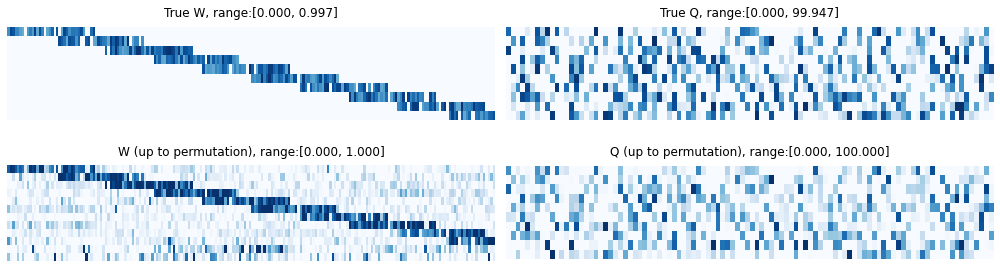

In [13]:
model = NMF_model(P, np.ones_like(P), 15, method='admm',
                  Wbound=(True, 1.0),
                  Qbound=(True, 100.0),
                  sparsity_parameter=0.01)
model.BIC_dimension(plot=True, search_range=np.arange(5, 16))
W, Q = model.decomposition()
plot_decomposition(W, Q, true_W, true_Q)